In [114]:
import numpy as np
import matplotlib.pyplot as plt

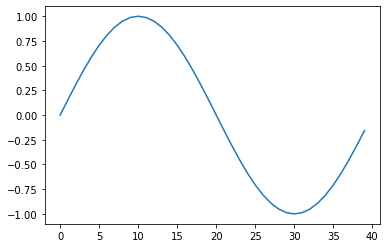

In [169]:
L = 40
x = np.arange(L)*1.
f = np.sin(2*np.pi*x/L)
plt.plot(x,f)

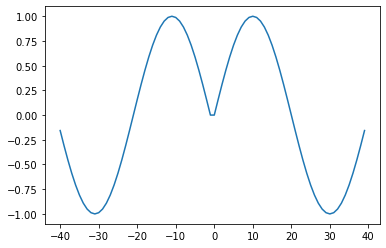

In [170]:
f_t = np.array([*f][::-1] + [*f])
plt.plot(np.arange(-L,L),f_t)

Text(0.5, 1.0, '$\\tilde{f}$')

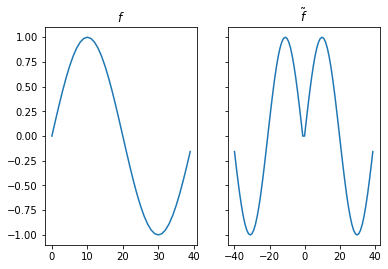

In [178]:
fig, (ax1, ax2) = plt.subplots(1,2,sharey = True)
ax1.plot(x,f)
ax2.plot(np.arange(-L,L),f_t)
ax1.set_title(r"$f$")
ax2.set_title(r"$\tilde{f}$")

In [163]:
f_t_h = np.fft.fft(f_t)

In [164]:
def base(k,n):
    if k == 0:
        return 1/np.sqrt(L)
    else:
        return np.sqrt(2/L)*np.cos((k*np.pi/L)*(n+1/2))

In [165]:
def α(k, f_hat):
    return (1/(2*np.sqrt(2*L)))*(f_hat[k]*np.e**(-1j*np.pi*k/L) + f_hat[2*L-k]*np.e**(-1j*np.pi*(2*L-k)/L))

In [166]:
f_appr = [np.sum([α(k,f_t_h)*base(k,n) for k in np.arange(1,L)]) for n in np.arange(L-1,-1,-1)]
f_appr += (1/(2*L))*f_t_h[0]

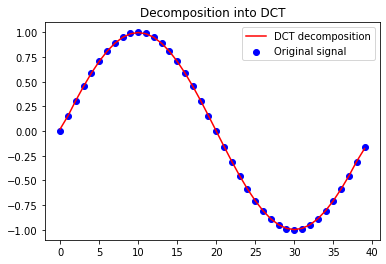

In [181]:
plt.plot(x,f_appr.real,color = "red")
plt.scatter(x,f,color = "blue")
plt.title("Decomposition into DCT")
plt.legend(["DCT decomposition","Original signal"])

Text(0.5, 1.0, 'Error between DCT decomposition and original signal')

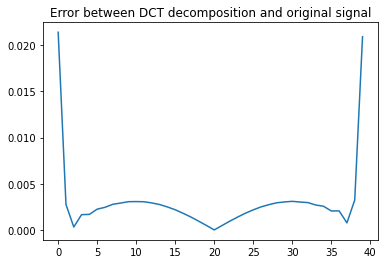

In [182]:
plt.plot(x,np.abs(f_appr.real-f))
plt.title("Error between DCT decomposition and original signal")

## problem 1

In [76]:
L = 10
x = np.arange(L)*1.
y = x**2
f_tilde = np.array([*y] + [*y][::-1] ) #tildify(y, L)

In [78]:
f_tilde

array([ 0.,  1.,  4.,  9., 16., 25., 36., 49., 64., 81., 81., 64., 49.,
       36., 25., 16.,  9.,  4.,  1.,  0.])

In [79]:
f_tilde_hat = np.fft.fft(f_tilde)

In [80]:
k_range = np.arange(L)

In [81]:
def decomposition(f_tilde_hat, k, L):
    return (1./(2*L))*np.sum([
        f_tilde_hat[k]*np.exp(-1j*np.pi*k/L),
        f_tilde_hat[2*L-k]*np.exp(-1j*np.pi*(2*L-k)/L)
    ])

In [82]:
a_k = np.array([f_tilde_hat[0]/2/L]+[decomposition(f_tilde_hat, k, L) for k in range(1,L)])

In [83]:
approx = np.array([np.sum(a_k * np.cos(np.arange(L)*np.pi*(x[i]+0.5)/L)).real for i in range(len(x))])

In [84]:
k = np.arange(L)

In [85]:
λ = lambda k: 1 if k!=0 else 1./np.sqrt(2)
def dct_basis(k, n, L):
    return λ(k)*np.sqrt(2/L)*np.cos(k*np.pi*(n+0.5)/L)

In [86]:
def alpha(f_tilde_hat, k, L):
    if k==0:
        return f_tilde_hat[0]/(2*np.sqrt(L))
    return (f_tilde_hat[k]*np.exp(-1j*np.pi/L) + f_tilde_hat[2*L-k]*np.exp(-1j*np.pi*(2*L-k)/L))/(2*np.sqrt(2*L))

In [87]:
f_approx2 = (np.array([dct_basis(k_i, x, L) for k_i in k]).T @ np.array([alpha(f_tilde_hat, k_i, L) for k_i in k])).real

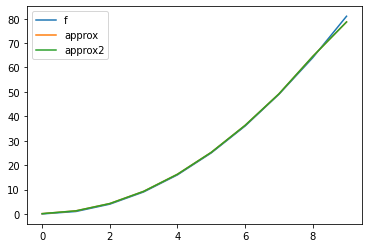

In [88]:
plt.plot(x, y, label='f')
plt.plot(x, approx, label='approx')
plt.plot(x, approx, label='approx2')
plt.legend()

## problem 2

In [14]:
X = plt.imread('cameraman_gray.jpeg')

In [15]:
X = X[:,:,0]

In [16]:
N = len(X)

In [17]:
L = 8

In [18]:
blocks = np.array([np.split(x,N//L,1) for x in np.split(X, N//L, 0)])

In [19]:
def basis2d(j,k,m,n):
    return np.prod([
        λ(j), 2./L, np.cos(j*np.pi*(n+0.5)/L),
        np.cos(k*np.pi*(m+0.5)/L)
    ])

In [20]:
B = np.empty((L,L))
for i in range(L):
    for j in range(L):
        B[i,j] = basis2d(i,j,x[i], x[j])

In [34]:
from scipy.fft import dct

In [35]:
scipy_block_dct = np.array([[dct(b) for b in row] for row in blocks])

In [38]:
block_dct = np.empty_like(scipy_block_dct)
for i in range(blocks.shape[0]):
    for j in range(blocks.shape[1]):
        for k in range(blocks.shape[2]):
            f_tilde = np.array([*blocks[i,j,k,:]] + [*blocks[i,j,k,:]][::-1])
            f_tilde_hat = np.fft.fft(f_tilde)
            for l in range(blocks.shape[3]):
                block_dct[i,j,k,l] = alpha(f_tilde_hat, l, L).real

In [39]:
recovered_blocks = np.concatenate([np.hstack(x) for x in block_dct])

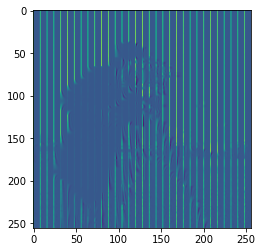

In [65]:
plt.imshow(recovered_blocks)

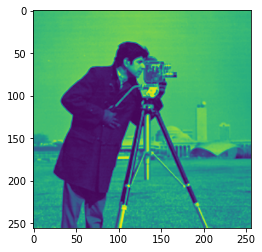

In [67]:
plt.imshow(X)

In [72]:
B.shape

(8, 8)

In [86]:
blocks[0,0].round(2)

array([[0.67, 0.68, 0.68, 0.67, 0.67, 0.68, 0.68, 0.68],
       [0.68, 0.67, 0.67, 0.67, 0.68, 0.68, 0.68, 0.68],
       [0.68, 0.68, 0.68, 0.67, 0.67, 0.68, 0.68, 0.68],
       [0.68, 0.67, 0.67, 0.67, 0.67, 0.68, 0.68, 0.68],
       [0.67, 0.66, 0.67, 0.68, 0.68, 0.67, 0.67, 0.67],
       [0.67, 0.66, 0.67, 0.68, 0.68, 0.67, 0.67, 0.67],
       [0.67, 0.67, 0.67, 0.67, 0.66, 0.67, 0.67, 0.67],
       [0.68, 0.67, 0.68, 0.67, 0.67, 0.67, 0.67, 0.68]], dtype=float32)

In [88]:
block_dct[0,0].round(2)

array([[ 1.91, -0.  ,  0.  , -0.  , -0.  , -0.  ,  0.  , -0.  ],
       [ 1.92, -0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 1.91, -0.  ,  0.01,  0.  , -0.  , -0.  ,  0.  ,  0.  ],
       [ 1.91, -0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.  , -0.  ],
       [ 1.91, -0.  , -0.01,  0.  ,  0.01,  0.  ,  0.  ,  0.  ],
       [ 1.9 , -0.  , -0.01, -0.  ,  0.01,  0.  ,  0.  ,  0.  ],
       [ 1.89,  0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  , -0.  ],
       [ 1.91,  0.  ,  0.01, -0.  ,  0.  , -0.  ,  0.  ,  0.  ]],
      dtype=float32)

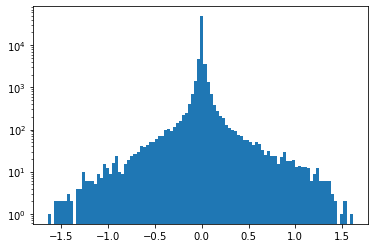

In [111]:
plt.hist(((block_dct*(L/np.sqrt(2))) - scipy_block_dct).flatten(), bins=100);
plt.yscale('log')
#plt.xlim((-2,2))

In [102]:
scipy_block_dct[0,0]

array([[ 1.0831373e+01, -7.6924330e-03,  7.2462233e-03, -6.5213302e-03,
        -1.6637553e-02, -4.3574134e-03,  3.0014841e-03, -1.5301201e-03],
       [ 1.0847059e+01, -9.0737594e-03,  1.1490568e-02,  2.7793661e-02,
         5.5458508e-03,  2.4682293e-03,  1.3248899e-02,  5.3732377e-04],
       [ 1.0831373e+01, -1.5301201e-03,  2.1738451e-02,  4.3574134e-03,
        -1.6637890e-02, -6.5213302e-03,  9.0043619e-03,  7.6924330e-03],
       [ 1.0831373e+01, -1.4065052e-02,  1.5735352e-02,  2.4966437e-02,
         5.5461880e-03,  1.6682040e-02,  2.3496496e-02, -2.7977126e-03],
       [ 1.0776471e+01, -9.7075561e-03, -4.5234993e-02,  1.7273933e-02,
         4.4367481e-02,  1.8212110e-02,  6.7311004e-03,  3.7236328e-03],
       [ 1.0729412e+01, -1.4213845e-02, -4.5234770e-02, -4.9911398e-03,
         3.3275440e-02,  3.3350666e-03,  6.7311917e-03,  2.8272774e-03],
       [ 1.0690197e+01,  1.9467499e-02,  1.2433473e-03, -1.7578363e-02,
        -5.5458508e-03,  2.0460311e-02,  1.7493712e-02, -8

In [85]:
(block_dct[0,0] @ B).round(2)

array([[0.34, 0.33, 0.31, 0.28, 0.24, 0.19, 0.13, 0.07],
       [0.34, 0.33, 0.31, 0.28, 0.24, 0.19, 0.13, 0.07],
       [0.34, 0.33, 0.31, 0.28, 0.24, 0.19, 0.13, 0.07],
       [0.34, 0.33, 0.31, 0.28, 0.24, 0.19, 0.13, 0.07],
       [0.34, 0.33, 0.31, 0.28, 0.24, 0.19, 0.13, 0.07],
       [0.33, 0.33, 0.31, 0.28, 0.24, 0.19, 0.13, 0.06],
       [0.33, 0.33, 0.31, 0.28, 0.24, 0.19, 0.13, 0.07],
       [0.34, 0.33, 0.31, 0.28, 0.24, 0.19, 0.13, 0.07]])

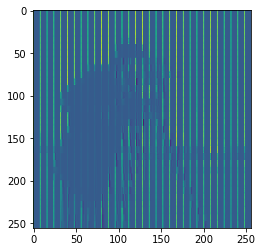

In [71]:
plt.imshow(np.concatenate([np.hstack(x) for x in  np.array([[B @ b for b in row] for row in block_dct]) ]))

In [45]:
B.reshape((1,1,L,L)) @recovered_blocks

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 256 is different from 8)

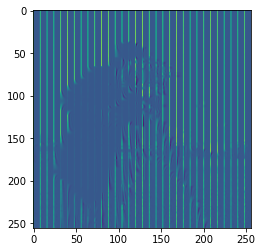

In [40]:
plt.imshow(recovered_blocks)

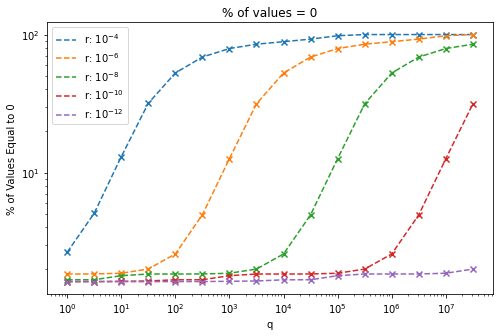

In [65]:
plt.figure(figsize=(8,5))
for r in [12, 10, 8, 6, 4][::-1]:
    q_range = 10**np.arange(0,8,0.5)
    is_zero = np.empty_like(q_range)
    for i, q in enumerate(q_range):
        Q = np.array([[1+q*(1+i+j) for i in range(L)] for j in range(L)])
        is_zero[i] = (np.round(block_dct / Q, r)==0).sum() *100 / (N*N)
    plt.plot(q_range, is_zero, linestyle='--', label=r'r: $10^{-'+str(r)+'}$')
    plt.scatter(q_range, is_zero, marker='x')
plt.loglog()
plt.ylabel('% of Values Equal to 0')
plt.xlabel('q')
plt.title('% of values = 0')
plt.legend()
plt.savefig('q_zero_plot', bbox_inches='tight');
plt.show()

In [26]:
L = 8
q = 5
Q = np.array([[1+q*(1+i+j) for i in range(L)] for j in range(L)])
Q

array([[ 6, 11, 16, 21, 26, 31, 36, 41],
       [11, 16, 21, 26, 31, 36, 41, 46],
       [16, 21, 26, 31, 36, 41, 46, 51],
       [21, 26, 31, 36, 41, 46, 51, 56],
       [26, 31, 36, 41, 46, 51, 56, 61],
       [31, 36, 41, 46, 51, 56, 61, 66],
       [36, 41, 46, 51, 56, 61, 66, 71],
       [41, 46, 51, 56, 61, 66, 71, 76]])

In [163]:
recovered_blocks = np.concatenate([np.hstack(x) for x in block_dct])

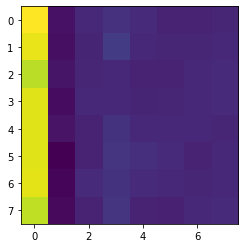

In [165]:
plt.imshow(block_dct[10,10])

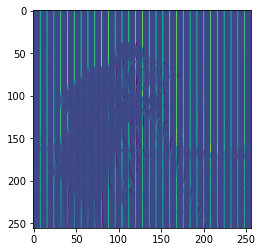

In [164]:
plt.imshow(recovered_blocks)

In [ ]:
def phi(k, k_prime, n, n_prime`):
    return λ(k)*np.sqrt(2/L)*np.cos(k*np.pi*(n+0.5)/L)